In [159]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer

# Generate Linear Data

In [226]:
from sklearn.datasets import make_regression
n_samples = 100

X, y, coef = make_regression(n_samples=n_samples, n_features=2,
                             n_informative=2, noise=0,
                             coef=True, random_state=0)
df = pd.DataFrame(X)
df['target'] = y
df.head()

,0,1,target
0,1.469359,1.532779,190.370562
1,-1.602058,0.625231,13.339570
2,-1.347759,1.883151,141.772669
3,1.222445,-0.403177,-3.069627
4,1.543015,-0.739563,-26.062465


<IPython.core.display.Javascript object>


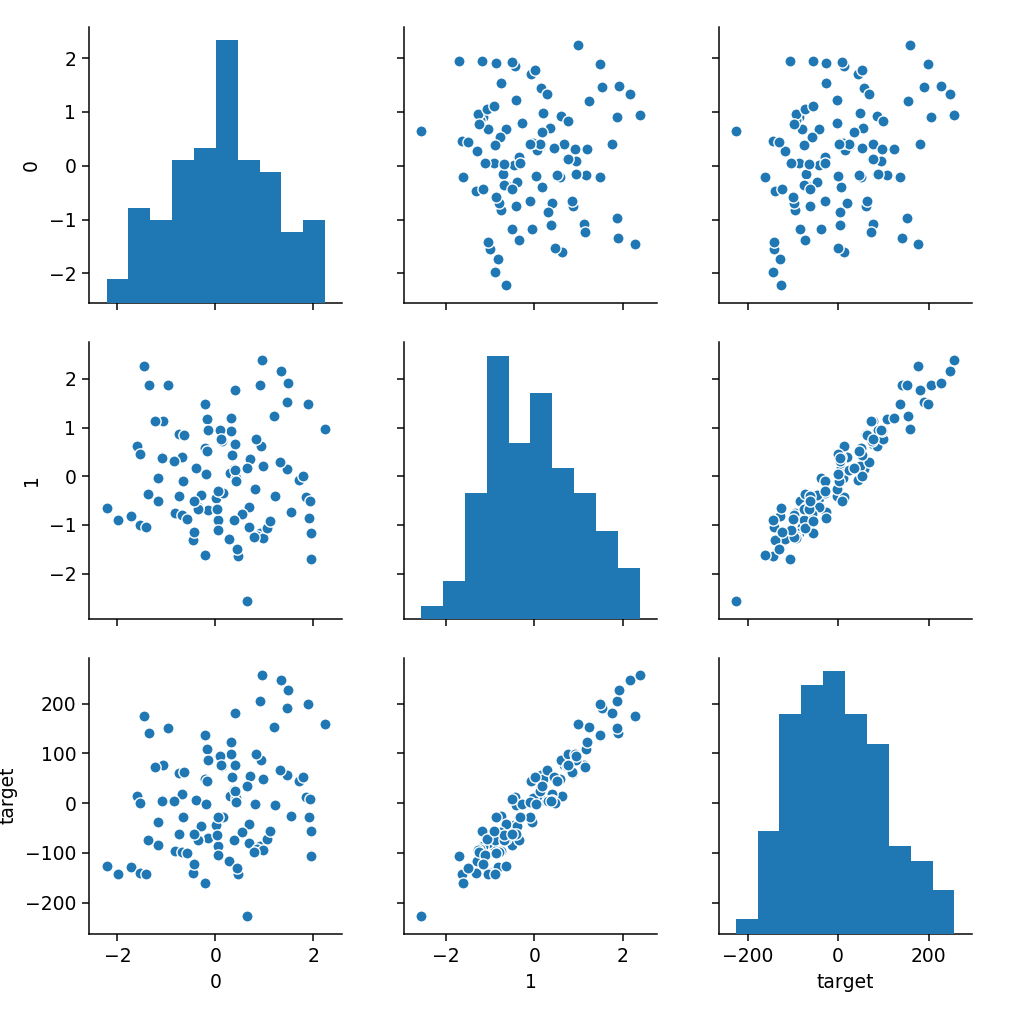

In [227]:
sns.pairplot(df)

# Use IRIS

In [235]:
df = sns.load_dataset('iris')
df = df[~(df.species=='setosa')].reset_index()
df.drop(columns=['index'], inplace=True)
df = df.iloc[:, :3]
df.head()

,sepal_length,sepal_width,petal_length
0,7.0,3.2,4.7
1,6.4,3.2,4.5
2,6.9,3.1,4.9
3,5.5,2.3,4.0
4,6.5,2.8,4.6


In [236]:
X = df[['sepal_length', 'sepal_width']]
y = df['petal_length']

# Use MPG

In [239]:
df = sns.load_dataset('mpg')
df = df[['horsepower', 'displacement', 'weight']]
#sns.pairplot(df)
df.head()

,horsepower,displacement,weight
0,130.0,307.0,3504
1,165.0,350.0,3693
2,150.0,318.0,3436
3,150.0,304.0,3433
4,140.0,302.0,3449


In [240]:
X = df[['horsepower', 'displacement']]
y = df['weight']

# Visualize Original Data

<IPython.core.display.Javascript object>


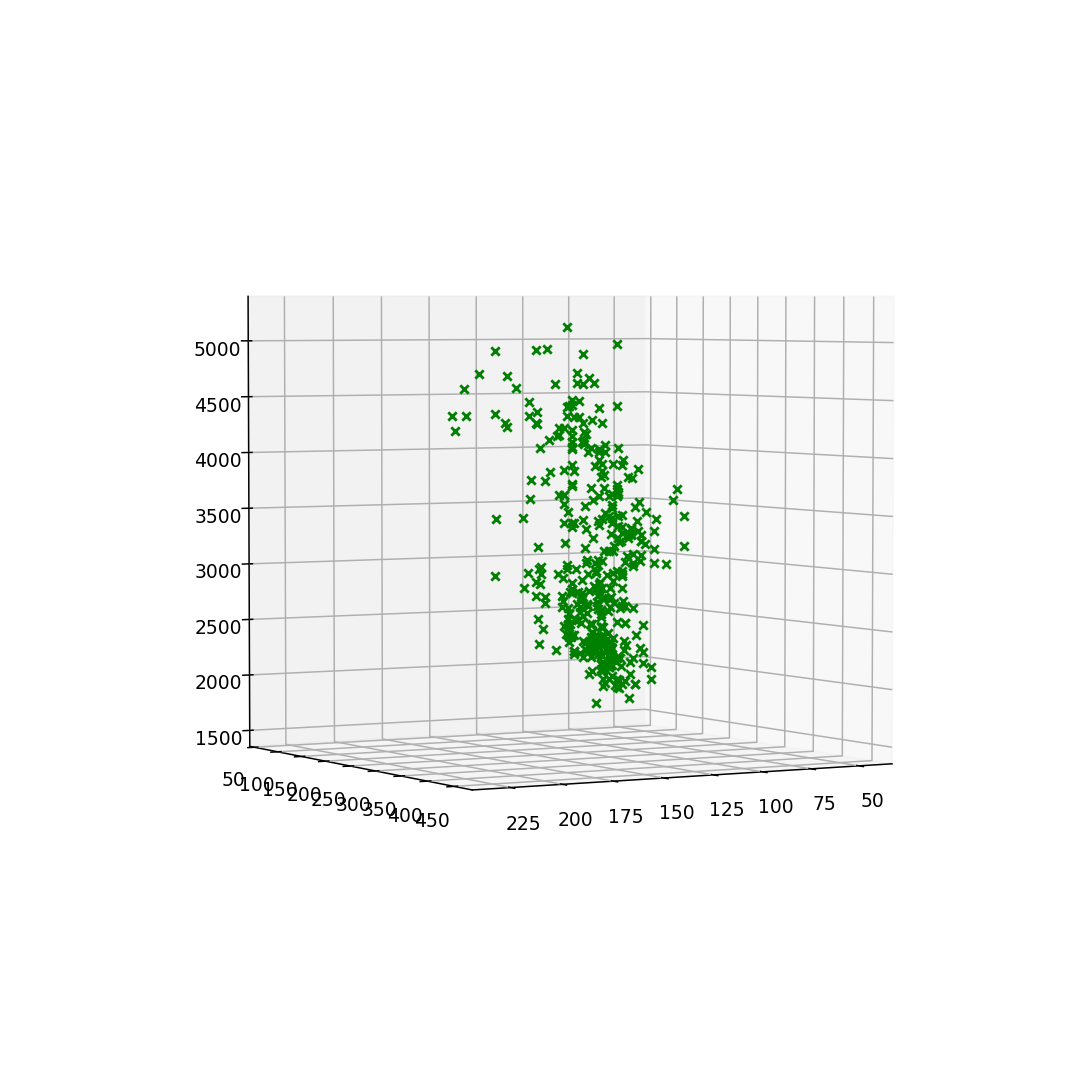

In [241]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook
#%matplotlib inline

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(0, 30)

# plot data points
for i in range(0, len(df)):
    ax.scatter(df.iloc[i,0], df.iloc[i,1], df.iloc[i, 2], color='green', marker='x')
    
    
ax.view_init(3, 60)
plt.show()

# Apply Pipeline and Visualize Prediction

In [253]:
X, X_test, y, y_test = train_test_split(df.iloc[:, :2], df.iloc[:, 2:3], test_size=0.1)

In [273]:
pipeline = make_pipeline(
    SimpleImputer(),
    StandardScaler(),
    PolynomialFeatures(3),
    #Ridge()
    LinearRegression()
)

pipeline = pipeline.fit(X, y)

<IPython.core.display.Javascript object>


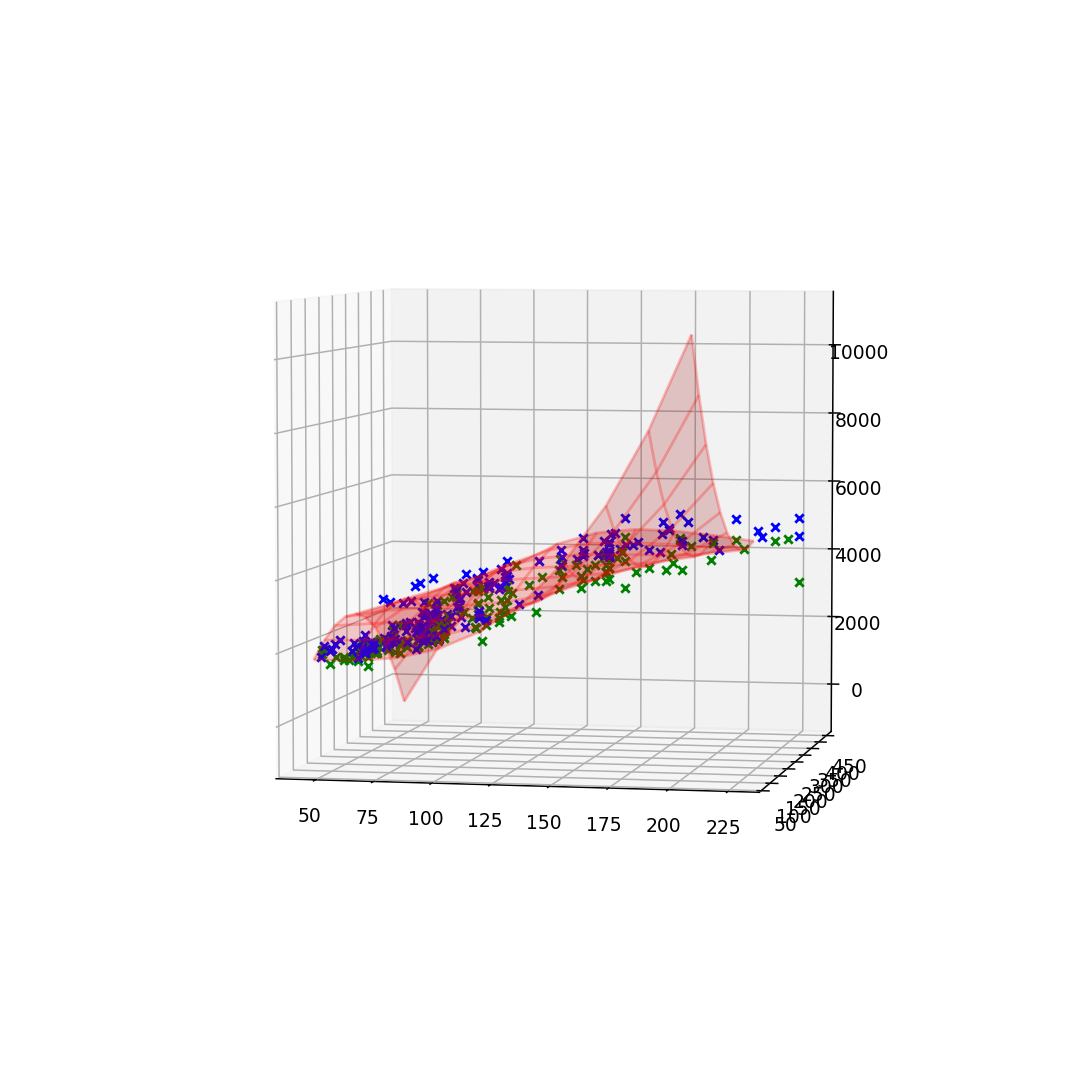

In [275]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(0, 30)

pred = pipeline.predict(X)

#plot data points
for i in range(0, len(y)):
    if (y.iloc[i,0]-pred[i]<0):
        ax.scatter(X.iloc[i,0], X.iloc[i,1], y.iloc[i,0], color='green', marker='x')
    else:
        ax.scatter(X.iloc[i,0], X.iloc[i,1], y.iloc[i,0], color='blue', marker='x')

    
# plot hyperplane
step_size_X0 = (max(X.iloc[:,0]) - min(X.iloc[:,0])) / 10.0
step_size_X1 = (max(X.iloc[:,1]) - min(X.iloc[:,1])) / 10.0
X0 = np.arange(min(X.iloc[:,0]), max(X.iloc[:,0]), step_size_X0)
X1 = np.arange(min(X.iloc[:,1]), max(X.iloc[:,1]), step_size_X1)
X0, X1 = np.meshgrid(X0, X1)
Z = X0.copy()
n = X0.shape[0]
m = X0.shape[1]
for i in range(0, n):
    for j in range(0, m):
        Z[i,j] = pipeline.predict([[X0[i,j], X1[i,j]]])

#ax.scatter(X0, X1, Z, color='red')
ax.plot_surface(X0, X1, Z, color='red', linewidth=0, antialiased=True, alpha=0.2)
ax.plot_wireframe(X0, X1, Z, color='red', alpha=0.25)

ax.view_init(3, 20)
plt.show()

<IPython.core.display.Javascript object>


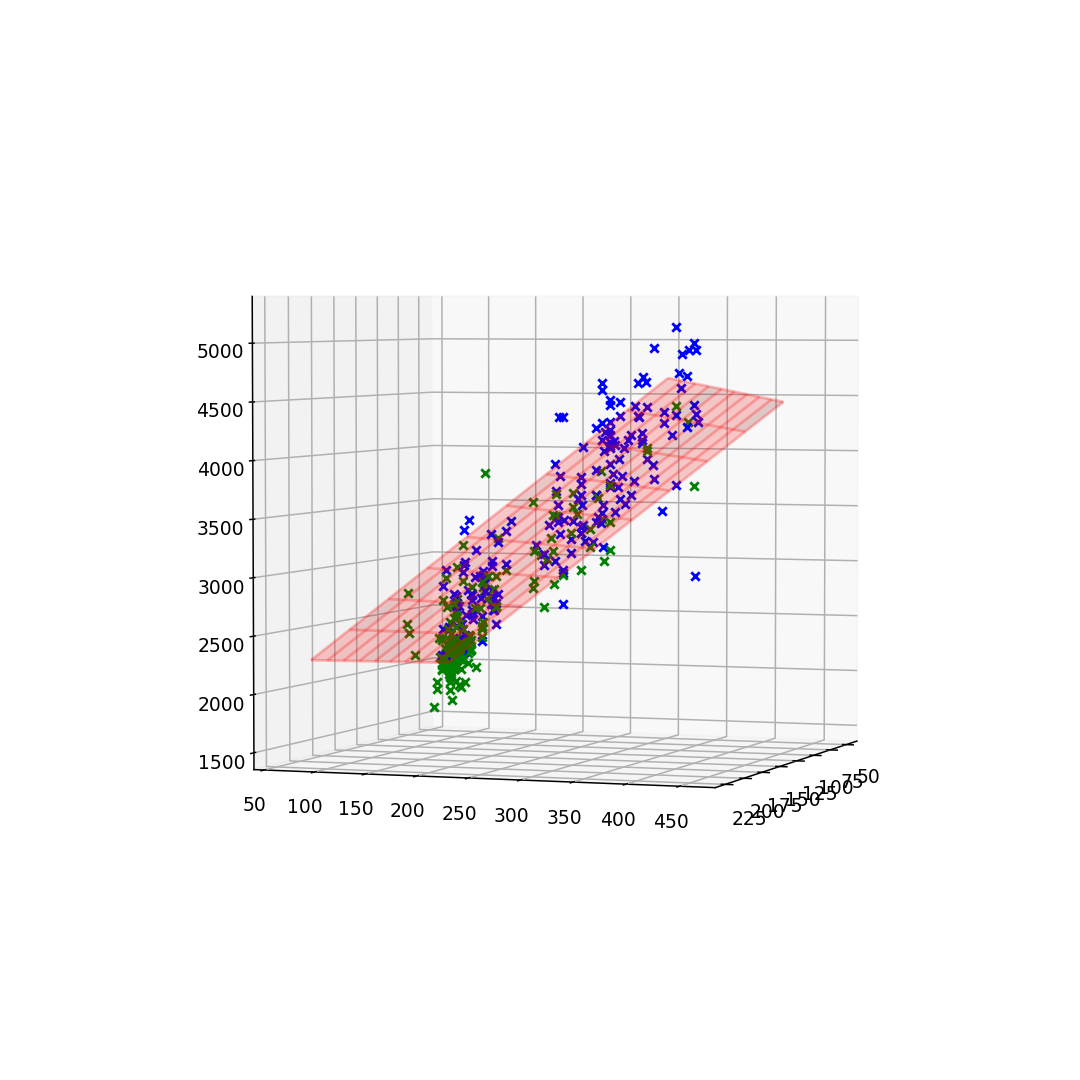

In [269]:
rand_index = np.random.choice(len(X), round(0.95*len(X)))
X_rand = X.iloc[rand_index, :]
y_rand = y.iloc[rand_index]

pipeline = pipeline.fit(X_rand, y_rand)

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(0, 30)

pred = pipeline.predict(X_rand)

#plot data points
for i in range(0, len(y_rand)):
    if (y.iloc[i,0]-pred[i]<0):
        ax.scatter(X.iloc[i,0], X.iloc[i,1], y.iloc[i,0], color='green', marker='x')
    else:
        ax.scatter(X.iloc[i,0], X.iloc[i,1], y.iloc[i,0], color='blue', marker='x')

    
# plot hyperplane
step_size_X0 = (max(X.iloc[:,0]) - min(X.iloc[:,0])) / 10.0
step_size_X1 = (max(X.iloc[:,1]) - min(X.iloc[:,1])) / 10.0
X0 = np.arange(min(X_rand.iloc[:,0]), max(X_rand.iloc[:,0]), step_size_X0)
X1 = np.arange(min(X_rand.iloc[:,1]), max(X_rand.iloc[:,1]), step_size_X1)
X0, X1 = np.meshgrid(X0, X1)
Z = X0.copy()
n = X0.shape[0]
m = X0.shape[1]

for i in range(0, n):
    for j in range(0, m):
        Z[i,j] = pipeline.predict([[X0[i,j], X1[i,j]]])

#ax.scatter(X0, X1, Z, color='red')
ax.plot_surface(X0, X1, Z, color='red', linewidth=0, antialiased=True, alpha=0.2)
ax.plot_wireframe(X0, X1, Z, color='red', alpha=0.25)

ax.view_init(3, 20)
plt.show()